In [1]:
import matplotlib
import matplotlib.animation
%matplotlib inline
import matplotlib.pyplot as plt
plt.ioff()
from IPython.display import HTML
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

In [2]:
import math
import numpy as np
import pandas as pd
import torch
import mantrap

# Visualization

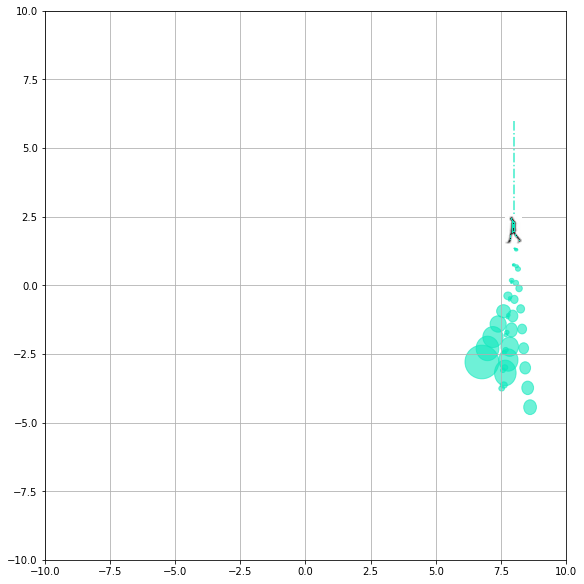

In [3]:
env = mantrap.environment.Trajectron(ego_position=torch.tensor([0.0, -1.0]))
env.add_ado(position=torch.tensor([8, 2]), velocity=torch.tensor([0, -2.0]))

ego_trajectory = torch.zeros((10, 5))
dist_dict = env.compute_distributions(ego_trajectory, vel_dist=False)

mantrap.visualization.visualize_prediction(env, ado_pos_gmm=dist_dict)
plt.show()

# Simple Environment 

In [4]:
solver = mantrap.solver.IPOPTSolver(env=env, goal=torch.tensor([8, 0]), is_logging=True, 
                                    modules=[mantrap.modules.GoalNormModule,
                                             mantrap.modules.baselines.InteractionEllipsoidModule,
                                             mantrap.modules.SpeedLimitModule])

ego_trajectory, _,  = solver.solve(time_steps=30, max_cpu_time=3.0) 
HTML(solver.visualize_scenes())

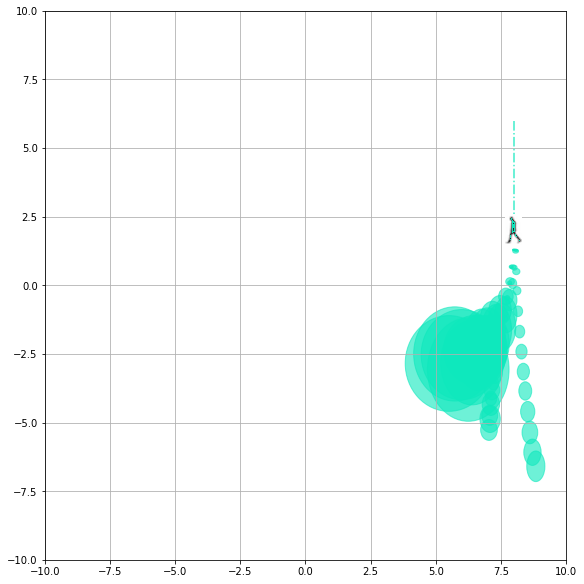

In [5]:
dist_dict = env.compute_distributions(ego_trajectory, vel_dist=False)

mantrap.visualization.visualize_prediction(env, ado_pos_gmm=dist_dict)
plt.show()

# Complex Environment

In [6]:
env = mantrap.environment.Trajectron(ego_position=torch.tensor([0.0, -1.0]))
env.add_ado(position=torch.tensor([3, 2]), velocity=torch.tensor([0, -1.0]))
env.add_ado(position=torch.tensor([-3, 7]), velocity=torch.tensor([1.0, -1.0]))
env.add_ado(position=torch.tensor([-4, -3]), velocity=torch.tensor([1.0, 1.0]))

solver = mantrap.solver.IPOPTSolver(env=env, goal=torch.tensor([8, 0]), is_logging=True, 
                                    modules=[mantrap.modules.GoalNormModule,
                                             mantrap.modules.baselines.InteractionEllipsoidModule,
                                             mantrap.modules.SpeedLimitModule])

ego_trajectory, _,  = solver.solve(time_steps=30, max_cpu_time=2.0) 
HTML(solver.visualize_scenes())

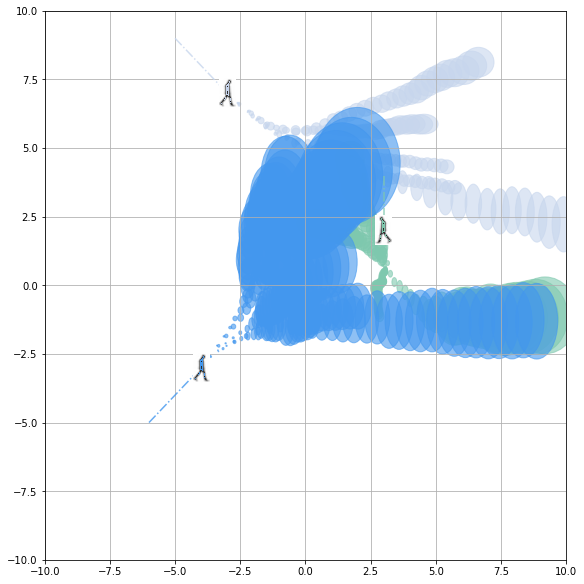

In [7]:
dist_dict = env.compute_distributions(ego_trajectory, vel_dist=False)

mantrap.visualization.visualize_prediction(env, ado_pos_gmm=dist_dict)
plt.show()